# ANN learning using sigmoid activation function and error gradient

## Basic structures and functions

In [14]:
import numpy as np
from matplotlib import pyplot as plt

# functional output
def fy(x, w):    
    return np.dot(x, w)

# sigmoid activation function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# sigmoid derivative for gradient
def sigmoid_derivative(x):
    return x * (1 - x)

# error
def error(activation, expected):    
    return np.subtract(expected, activation)
    # return np.square(np.sum(np.subtract(expected, activation)))/2

# weight update
def wt(wt_1, x, error, learning_rate):
    return wt_1 + (x * error * learning_rate)

# simple neural structure with 1 neuron
class SimpleNN:      
    # A set of bias, x1, x2, class label
    training_data = np.array([[-1, 1, 1, 1],
                              [-1, 1, 0, 1],
                              [-1, 0, 1, 1],
                              [-1, 0, 0, 0]])

    # a set of random weights
    weights = np.array([0, 0.5, 0.7])

    #learning rate
    learning_rate = 0.9
    
    # splitting input and output from training data
    input_data = training_data[:, [0, 1, 2]]

    desired_output = training_data[:, [3]].T[0]   

## Testing the structures

In [15]:
snn = SimpleNN()

print("Training data", snn.training_data)
print("Weights", snn.weights)
print("Learning rate: ", snn.learning_rate)
print("Input data", snn.input_data)
print("Desired output", snn.desired_output)

Training data [[-1  1  1  1]
 [-1  1  0  1]
 [-1  0  1  1]
 [-1  0  0  0]]
Weights [0.  0.5 0.7]
Learning rate:  0.9
Input data [[-1  1  1]
 [-1  1  0]
 [-1  0  1]
 [-1  0  0]]
Desired output [1 1 1 0]


## Testing the functions

In [16]:
# testing feed forward
fo = np.array(fy(snn.input_data, snn.weights))
sig_o = np.array([sigmoid(o) for o in fo])
sig_d = sigmoid_derivative(sig_o)

# testing back propagation
err = error(sig_o, snn.desired_output)
output_err = err * sig_d

print("Functional output", fo)
print("Sigmoid output", sig_o)
print("Sigmoid derivative", sig_d)
print("Error", err)
print("Output error", output_err)

Functional output [1.2 0.5 0.7 0. ]
Sigmoid output [0.77 0.62 0.67 0.5 ]
Sigmoid derivative [0.18 0.24 0.22 0.25]
Error [ 0.23  0.38  0.33 -0.5 ]
Output error [ 0.04  0.09  0.07 -0.12]


## Learning algorithm using sigmoid activation function and error gradient

In [20]:
precision = 2
np.set_printoptions(precision=precision)

    
# preparing initial data for training
w = snn.weights

counter = 0
epoch = 1

# log MSE of each epoch then plot them afterwards
epoch_errors_log = []

# if output equals desired output, no need to train
while epoch < 10:
   
    print("Epoch", epoch)    
    print("|{:<20}|{:^16}|{:^16}|{:^8}|{:^8}|{:^8}|{:^8}|{:>12}|".format('weights', 
                                                                             'inputs', 
                                                                             'desired_output' , 
                                                                             'fo', 
                                                                             'sig_o', 
                                                                             'sig_d', 
                                                                             'err', 
                                                                             'output_err'))
    
    epoch_error = []
    
    # in each epoch, iterate through all training data
    for x in snn.input_data:
        current_input = snn.input_data[counter%4]
        desired_output = snn.desired_output[counter%4]
        
        # feed-forward 
        fo = fy(current_input, w)
        sig_o = sigmoid(fo)      
        
        # back propagation
        err = desired_output - sig_o
        sig_d = sigmoid_derivative(sig_o)
        output_err = err * sig_d
        
        epoch_error.append(output_err)
        
        # check error for current iteration i.e. current set of inputs. 
        # Current set of inputs can be located by using index of current set i.e. counter % 4 since there are 4 sample data
        
        print("|{:<20}|{:^16}|{:^16}|{:^8}|{:^8}|{:^8}|{:^8}|{:>12}|".format(str(w),
                                                                                 str(x),
                                                                                 str(desired_output),
                                                                                 "{:.{}f}".format(fo, precision),
                                                                                 "{:.{}f}".format(sig_o, precision), 
                                                                                 "{:.{}f}".format(sig_d, precision),
                                                                                 "{:.{}f}".format(err, precision),
                                                                                 "{:.{}f}".format(output_err, precision)))
                                                                                 
              # "\t\t", "{:.{}f}".format(output_err,precision), 
              # "\t\t\t", "{:.{}f}".format(sig_o,precision)) 
        w = wt(w, current_input, output_err, snn.learning_rate)
        
        # end of back propagation
                               
        counter += 1
        
    mse = np.sum(np.square(epoch_error))/4
    epoch_errors_log.append(mse)
    print("Mean square error (actual error) in the epoch: ", "{:.{}f}\n".format(mse, 5))
        
    epoch += 1


print("Final weights: ", w)

Epoch 1
|weights             |     inputs     | desired_output |   fo   | sig_o  | sig_d  |  err   |  output_err|
|[0.  0.5 0.7]       |   [-1  1  1]   |       1        |  1.20  |  0.77  |  0.18  |  0.23  |        0.04|
|[-0.04  0.54  0.74] |   [-1  1  0]   |       1        |  0.57  |  0.64  |  0.23  |  0.36  |        0.08|
|[-0.11  0.61  0.74] |   [-1  0  1]   |       1        |  0.85  |  0.70  |  0.21  |  0.30  |        0.06|
|[-0.17  0.61  0.79] |   [-1  0  0]   |       0        |  0.17  |  0.54  |  0.25  | -0.54  |       -0.13|
Mean square error (actual error) in the epoch:  0.00766

Epoch 2
|weights             |     inputs     | desired_output |   fo   | sig_o  | sig_d  |  err   |  output_err|
|[-0.05  0.61  0.79] |   [-1  1  1]   |       1        |  1.45  |  0.81  |  0.15  |  0.19  |        0.03|
|[-0.07  0.64  0.82] |   [-1  1  0]   |       1        |  0.71  |  0.67  |  0.22  |  0.33  |        0.07|
|[-0.14  0.7   0.82] |   [-1  0  1]   |       1        |  0.96  |  0.72  |  0.2

## Visualizing the error

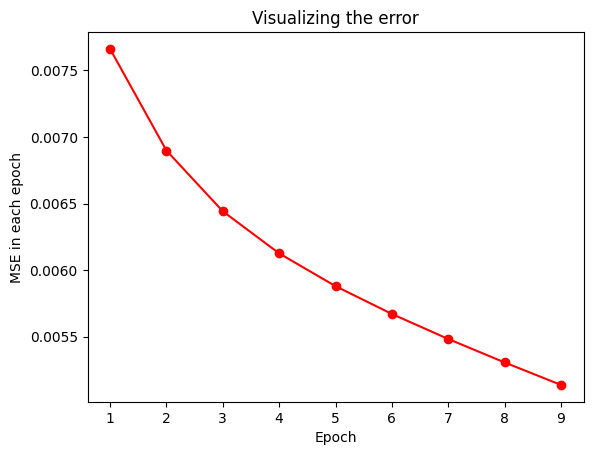

In [21]:
plt.clf()
plt.plot(epoch_errors_log, color='red', marker='o', linestyle='solid')
plt.xticks(np.arange(len(epoch_errors_log)), np.arange(1, len(epoch_errors_log)+1))
plt.xlabel("Epoch")
plt.ylabel("MSE in each epoch")
plt.title("Visualizing the error")
plt.show()

## Test the output with learned weights

In [22]:
# test and check outputs for AND and OR gates

print(np.dot(snn.training_data[0][:3], w))
print(np.dot(snn.training_data[1][:3], w))
print(np.dot(snn.training_data[2][:3], w))
print(np.dot(snn.training_data[3][:3], w))

2.3131494022285346
1.0796364267477023
1.1760815708393777
-0.05743140464145447
